#  Heaps (6.1)
## Formal characteristics
- Attributes
    - length (size of the array)
    - heap-size (size of the subarray that are in a heap; can be 0)

- Properties of all heaps
    - $A[i].parent$ = $A[\lfloor i/2 \rfloor]$
    - $A[i].leftChild$ = $A[i*2]$
    - $A[i].rightChild$ = $A[i*2 + 1]$
    - Viewed as a tree
        - The height of a node in a heap is the number of edges on the longest simple downward path from the node to a leaf
        ```
              1               height = 3
            /   \
           2     8            height = 2
          / \   / \
         3   4  9  10         height = 1
        ```

- Properties of `min-heaps`
    - *min heap property*: $A[i].parent \leq A[i]$

- Properties of `max-heaps`
    - *max heap property*: $A[i].parent \geq A[i]$

- Procedures
    - `MaxHeapify`
        - Time complexity: $O(\lg n)$
        - Maintains the max-heap property
    - `BuildMaxHeap`
        - Time complexity: $O(n)$
        - Converts any array to a max-heap
    - `Heapsort`
        - Time complexity: $O(n \lg n)$
        - Sorts an array in place 
    - Priority queue procedures:
        - $MaxHeapInsert$
            - Time complexity: $O(\lg n)$
        - $HeapExtractMax$
            - Time complexity: $O(\lg n)$
        - $HeapIncreaseKey$
            - Time complexity: $O(\lg n)$
        - $HeapMaximum$
            - Time complexity: $O(\lg n)$

## Usage
- min heaps: priority queues
- max heaps: heapsort

## Excercises 
### Min/max cardinality of heap of height $h$ (6.1-1)
- max: $2^h$
- min: $2^{h-1} + 1$
- max number of nodes at a given height: $\lceil n/2^{h+1} \rceil$

### Show that an $n$-element heap has a height of $\lfloor \lg n \rfloor$ (6.1-2)
1. $\text{Base case}$: a 0-element heap trivially has a height of $\lfloor \lg n \rfloor$
2. $\text{Inductive hypothesis (IH)}$: $n$-element heap has a height of $\lfloor \lg n \rfloor$
3. $\text{Induction steps}$
    1. Let us assume $IH$ holds for $n$, and prove it for $n+1$.
    2. A parent node may have a maximum of 2 children
    3. We know that a min-heap like `[1,2,3]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    4. We know that a min-heap like `[1,2]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    5. We know that a min-heap like `[1]` has a height of 0 ($\lg 1$)
    6. We observe that this pattern would fan out across all children in the range of $2^i..2^{i+1}$
    7. $\therefore$ we know that an $n$-element heap has a height of $\lfloor \lg n \rfloor$
       $QED$

### Where in a max heap might the smallest element reside (6.1-4)
Assuming elements are distinct, and that the heap is balanced, the smallest element might be an element in the last $x$ elements of the heap, where $x = 2^{(\lfloor \lg n\rfloor)}$ ... but consider `[16,4,10,14,7,9,1,3,8,2]`

### `def visualize_heap`

In [1]:
from typing import SupportsIndex, Sized
from gvanim import Animation
from graphviz import Digraph


def visualize_heap(heap_array, comment="Heap Visualization", label=None, highlights=None):
    """
    Visualizes a binary heap from its array representation using Graphviz.

    Args:
        heap_array (list): A list representing the heap in its array notation.
        comment (str): The comment for the visualization.
        label (str): The shown title of the visualization.
        highlights ([int]): Indices that should be colored blue instead of white.
    """
    if not heap_array:
        print("Heap is empty.")
        return None

    dot = Digraph(comment=comment, node_attr={'shape': 'circle'})
    if label:
        dot.attr(label=label, labelloc='t', labeljust='l', fontsize='20') # Graph label at the top-left


    for i, value in enumerate(heap_array):
        # Add a node for each element in the heap
        if highlights and i in highlights:
            dot.node(str(i), str(value), style='filled', fillcolor='lightblue')
        else:
            dot.node(str(i), str(value))

        # Calculate parent index
        parent_index = (i - 1) // 2

        # Add an edge from the parent to the current node (except for the root)
        if i > 0:
            dot.edge(str(parent_index), str(i))

    return dot

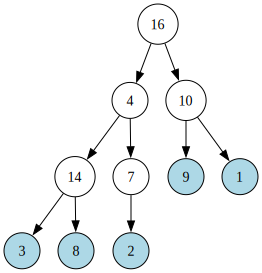

In [2]:
visualize_heap([16, 4, 10, 14, 7, 9, 1, 3, 8, 2], highlights=range(5,10))

Mabye the right definition is `the minimum value will always be a leaf`

### Is a asc-sorted array always a min-heap?
Yes!


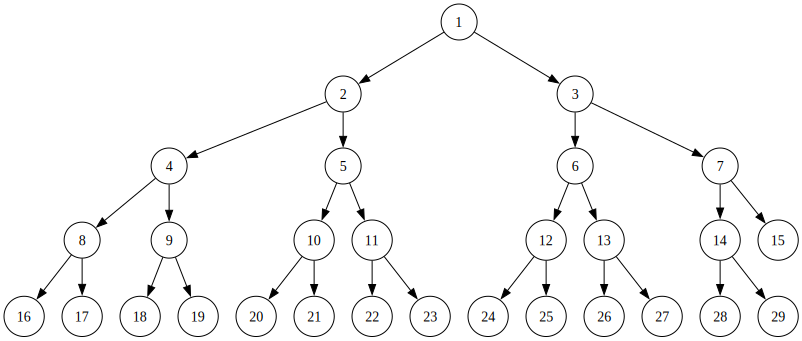

In [3]:
visualize_heap(list(range(1, 30)))

# Maintaining the heap-property (6.2)
To maintain the heap property, we call `heapify`.

In [4]:
from gvanim import Animation

def swap(A, e1, e2):
    # print(f'swapping A[{e1}] ({A[e1]}) with A[{e2}] ({A[e2]})')
    temp = A[e2]
    A[e2] = A[e1]
    A[e1] = temp

def left(i):
    '''
    in a 0-indexed language like python we have to add an additional 1
    '''
    rv = (i)*2 +1
    # print(f'calculated l of {i}: {rv}')
    return rv
    
def right(i):
    '''
    in a 0-indexed language like python we have to add an additional 1
    '''
    rv = left(i) + 1
    # print(f'calculated r of {i}: {rv}')
    return rv

def parent(i):
    return (i+1)//2

class MaxHeap():
    def __init__(self, A=[]):
        self.A = A
        self.length = len(A)
        self.heapsize = self.length

    def __getitem__(self, item):
        return self.A[item]

    def __setitem__(self, key, value):
        self.A[key] = value

    def __len__(self):
        return len(self.A)

    def __repr__(self):
        return f'MaxHeap ({self.A}, heapsize: {self.heapsize})'
    
def max_heapify(A, i):
    '''bubble up the largest child per iteration towards the root'''
    l = left(i)
    r = right(i)
    largest = i
    # try:
    #     # print(f'i -> A[{i}] ({A[i]})')
    # except IndexError:
    #     # print(f'i -> A[{i}]')
    # try:
    #     # print(f'l -> A[{l}] ({A[l]})')
    # except IndexError:
    #     # print(f'l -> A[{l}]')
    # try:
    #     # print(f'r -> A[{r}] ({A[r]})')
    # except IndexError:
    #     # print(f'r -> A[{r}]')
    if l < A.heapsize and A[l] > A[i]:
            # print(f'A[l] > A[i]')
            largest = l
    if r < A.heapsize and A[r] > A[largest]:
        # print(f'A[r] > A[i]')
        largest = r
    if largest != i:
        swap(A, i, largest)
        max_heapify(A, largest)

def ga_max_heapify(A, i, ga:Animation):
    '''bubble up the largest child per iteration towards the root'''
    l = left(i)
    r = right(i)
    largest = i
    # try:
    #     # print(f'i -> A[{i}] ({A[i]})')
    # except IndexError:
    #     # print(f'i -> A[{i}]')
    # try:
    #     # print(f'l -> A[{l}] ({A[l]})')
    # except IndexError:
    #     # print(f'l -> A[{l}]')
    # try:
    #     # print(f'r -> A[{r}] ({A[r]})')
    # except IndexError:
    #     # print(f'r -> A[{r}]')
    if l < A.heapsize and A[l] > A[i]:
        # print(f'A[l] > A[i]')
        largest = l
    if r < A.heapsize and A[r] > A[largest]:
        # print(f'A[r] > A[i]')
        largest = r
    if largest != i:
        ga.next_step()
        ga.highlight_node(v=i+1)
        ga.highlight_node(v=largest+1)
        
        swap(A, i, largest)
        
        ga.next_step()
        ga.highlight_node(v=i+1)
        ga.highlight_node(v=largest+1)
        max_heapify(A, largest)
    else:
        ga.next_step()
        ga.highlight_node(v=i+1, color='green')

## Bubble up
- When a key is not in the right relation with its parent, swap it with its parent
## Bubble down
- When a key is not in the right relation with its children, swap it with one of its children
    - min-heap: swap with smallest child
    - max-heap: swap with biggest child

Time complexity: $O(\lg n)$

## Exercises
### Illustrate `max_heapify` (6.2-1)
We want to max-heapify this tree: `[27,17,3,16,13,10,1,5,7,12,4,8,9,0]` where 3 is out of place.

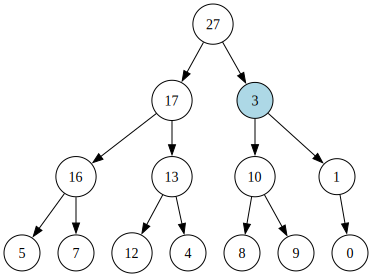

In [5]:
visualize_heap([27,17,3,16,13,10,1,5,7,12,4,8,9,0], highlights=[2])

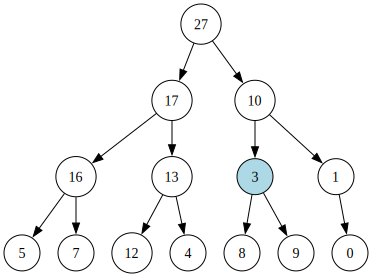

In [6]:
visualize_heap([27,17,10,16,13,3,1,5,7,12,4,8,9,0], highlights=[5])

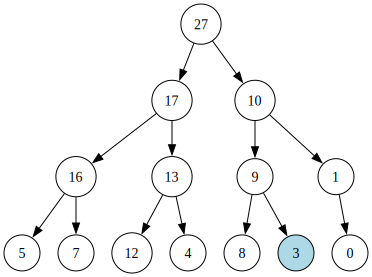

In [7]:
visualize_heap([27,17,10,16,13,9,1,5,7,12,4,8,3,0], highlights=[12])

### code for min-heapify (6.2-2)
The run time should be the same as max-heapify

In [8]:
def min_heapify(A, i):
    l = left(i)
    r = right(i)
    smallest = i
    '''we assume all child trees of A[i] are min-heaps and try to find the spot for A[i]'''
    if l < len(A) and A[l] < A[i]:
        smallest = l
    if r < len(A) and A[r] < A[smallest]:
        smallest = r
    if smallest != i:
        swap(A, i, smallest)
        min_heapify(A, smallest)
    

### Effect of calling `max_heapify(A,i)` when `A[i]` is larger than its children (6.2-3)
the largest encountered value is equal to `A[i]`, so no swaps take place

### Effect of calling `max_heapify(A,i)` for $i > A.heapsize / 2$ (6.2-4)
It would be like calling it on all leaves, which is useless, because they have no subtrees.

### Iterative instead of recursive implementation of `max_heapify(A,i)` (6.2-5)

### Why is the worst case running time of `max_heapify` on a heap size $n$ is $\Omega(\lg{n})$

$\text{maxheapify}(A, 0) = \Omega(\lg{n})$
- $\text{maxheapify}$ is asymptotically lower-bounded by $\lg{n}$
- $\exists{K}, \exists{N} | \forall n \leq N:  f(n) \geq K\times g(n)$

The maximum number of swaps would be swapping the root all the way down to the deepest leaf, which would take $\lg(n)$ swaps. 

# Building a heap
"bottom up", as in from the leaves to the root

## Helper functions

In [9]:
def parents(A):
    return range(0, len(A)//2)

def leaves(A):
    return range(len(A)//2, len(A))

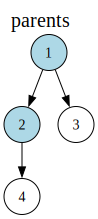

In [10]:
A = [1,2,3,4]
i = parents(A)
visualize_heap(A, highlights=i, label="parents")

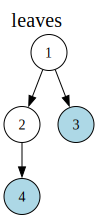

In [11]:
A = [1,2,3,4]
i = leaves(A)
visualize_heap(A, highlights=i, label="leaves")

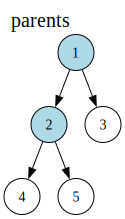

In [12]:
A = [1,2,3,4,5]
i = parents(A)
visualize_heap(A, highlights=i, label='parents')

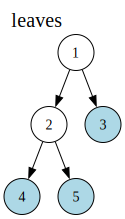

In [13]:
A = [1,2,3,4,5]
i = leaves(A)
visualize_heap(A, highlights=i, label='leaves')

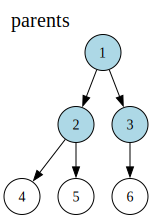

In [14]:
A = [1,2,3,4,5,6]
i = parents(A)
visualize_heap(A, highlights=i, label='parents')

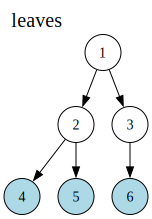

In [15]:
A = [1,2,3,4,5,6]
i = leaves(A)
visualize_heap(A, highlights=i, label='leaves')

## `def build_maxheap(A)`

In [16]:
def build_max_heap(A:MaxHeap):
    for i in reversed(parents(A)):
        max_heapify(A, i)
    return A

original: [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
maxheap : [27, 17, 10, 16, 13, 9, 1, 5, 7, 12, 4, 8, 3, 0]


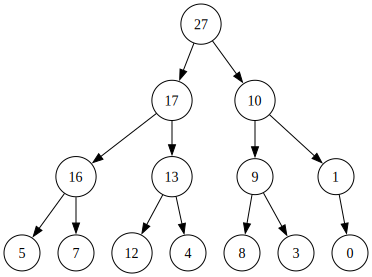

In [17]:
original = [27,17,3,16,13,10,1,5,7,12,4,8,9,0]
print(f'original: {original}')
h=build_max_heap(MaxHeap(original))
print(f'maxheap : {h.A}')

visualize_heap(h)

## Exercises

### Illustrate build-max-heap (6.3-1)
Given the input `[5,3,17,10,84,19,6,22,9]`...


In [18]:
import os
from gvanim import Animation, render, gif
# from gvanim.jupyter import interactive
import hashlib
import gvanim

def init_gvanim_graph(ga:Animation, A:[int]):
    for i in range(0, len(A)):
        ga.remove_node(i)
        ga.remove_edge(parent(i), i)
    ga.label_node(v = 1,label = A[0])
    for i in range(1, len(A)):
        ga.label_node(v=i+1, label=A[i])
        ga.add_edge(parent(i), i+1)
        
def ga_build_max_heap(A):
    ga = Animation()
    init_gvanim_graph(ga, A)
    for i in reversed(parents(A)):
        init_gvanim_graph(ga, A)
        ga_max_heapify(A, i, ga)
    ga.next_step()
    init_gvanim_graph(ga, A)
    ga.highlight_node(1, color='green')
    
    digest = hashlib.sha256(str(A).encode()).hexdigest()[:8]
    assets_dir=f'assets/gvanim/build-max-heap/{digest}'
    basename = str.join('/', [assets_dir , 'frame'])
    gif_basename = f'{assets_dir}/{digest}'

    try:
        os.makedirs(assets_dir, exist_ok=False)
        files = render(ga.graphs(), basename) 
        gif(files, gif_basename)
    except FileExistsError:
        pass
    
    return (ga, f'{gif_basename}.gif') 

A = MaxHeap([5,3,17,10,84,19,6,22,9])
ga, gif = ga_build_max_heap(A)
# interactive(ga)

In [19]:
from IPython.display import display_markdown
print(A)
print(gif)
# gif
display_markdown(f"![]({gif})", raw = True)

MaxHeap ([84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9)
assets/gvanim/build-max-heap/31657e57/31657e57.gif


![](assets/gvanim/build-max-heap/31657e57/31657e57.gif)

In [20]:
A = MaxHeap([5,3,17,10,84,19,6,22,9])
i = len(A)//2 - 1

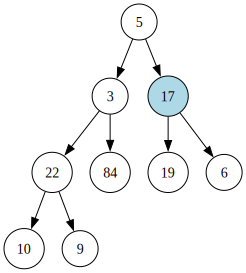

In [21]:
# run the cell above once... then you can run this one over and over to iterate
max_heapify(A, i)
i = len(A) // 2 -1 if i < 0 else i-1
visualize_heap(A, highlights=[i]) if i > -1 -1 else None

### Why decrement the loop index from the midpoint? (6.3-2)
because leafs are trivial max-heaps, and will be ordered as the first half of the array is handled

# The heapsort algorithm

In [41]:
from gvanim import gif

def heapsort(A:MaxHeap) -> Animation:
    build_max_heap(A)
    for i in reversed(range(1, A.heapsize)):
        swap(A, 0, i)
        A.heapsize -= 1
        max_heapify(A, 0)
    
def ga_heapsort(A:MaxHeap) -> Animation:
    ga, img = ga_build_max_heap(A)
    for i in reversed(range(1, len(A))):
        ga.next_step()
        init_gvanim_graph(ga, A)
        ga.highlight_node(1, color='yellow')
        ga.highlight_node(i, color='green')
        swap(A, 0, i)
        ga.next_step()
        ga.remove_edge(1,2)
        ga.remove_edge(1,3)
        A.heapsize -= 1
        max_heapify(A, 0)
        ga.next_step()
        ga.remove_edge(i, parent(i))
    ga.next_step()
    init_gvanim_graph(ga, A)
    ga.highlight_node(1, color='green')
    return to_gif(A,ga)

def to_gif(A, ga:Animation, overwrite:bool=True):
    digest = hashlib.sha256(str(A).encode()).hexdigest()[:8]
    assets_dir=f'assets/gvanim/build-max-heap/{digest}'
    basename = str.join('/', [assets_dir , 'frame'])
    gif_basename = f'{assets_dir}/{digest}'
    try:
        os.makedirs(assets_dir, exist_ok=overwrite)
        files = render(ga.graphs(), basename) 
        gif(files, gif_basename)
    except FileExistsError:
        pass
    
    return (ga, f'{gif_basename}.gif') 

ls = [5,3,17,10,84,19,6,22,9]
print(f'ls: {ls}') 
A = MaxHeap(ls)
print(f'(RED) {A}') 
ga,img = ga_heapsort(A)
print(f'(GREEN/YELLOW) {A}')
# interactive(ga)

ls: [5, 3, 17, 10, 84, 19, 6, 22, 9]
(RED) MaxHeap ([5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 9)
(GREEN/YELLOW) MaxHeap ([3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1)


In [42]:
from IPython.display import display_markdown
print(A)
print(img)
# gif
display_markdown(f"![]({img})", raw = True)

MaxHeap ([3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1)
assets/gvanim/build-max-heap/d47fff1f/d47fff1f.gif


![](assets/gvanim/build-max-heap/d47fff1f/d47fff1f.gif)

## Exercises
### Illustrate heapsort (6.4-1)


In [43]:
from IPython.display import display_markdown
A = MaxHeap([5,13,2,25,7,17,20,8,4])
print(A)
ga,img = ga_heapsort(A)
display_markdown(f"![]({img})", raw = True)

MaxHeap ([5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 9)


![](assets/gvanim/build-max-heap/82ce79f7/82ce79f7.gif)

### Argue the correctness of HeapSort (6.4-2)

```pseudo
1  HeapSort(A)
2      BuildMaxHeap(A)
3      for i = A.length downto 2
4          exchange A[1] with A[i]
5          A.heap-size = A.heap-size - 1
6          MaxHeapify(A, 1)
```

> $\text{Loop Invariant}:$ At the start of each iteration of the **for** loop of lines 2-5,
>  the subarray $A[1..i]$ is a max-heap containing the $i$ smallest elements of $A[1..n]$,
>  and the subarray $A[n+1..n]$ contains the $n-i$ largest elements of  $A[i+1..n]$, sorted.

$\text{Initialization:}$ Before the first iteration, we know that the entirety of $A$ abides by the Loop Invariant because we have proven elsewhere that `BuildMaxHeap` yields a max heap.

$\text{Maintenance:}$ As the for loop iteratively decrements $i$, MaxHeapify is the last function to touch A. This guarantees the Loop Invariant because every child of a max-heap is a max-heap, and callign MaxHeapify has been proven to yeild a maxheap. The size of the resultant maxheap decreases by 1 with every iteration. 

$\text{Termination:}$ At the end of the for loop, all elements will have beeN removed from the max heap, and tehy are all max heaps unto them self

### Time complexity of heapsort (6.4-3)

Regardless of whether A arrives sorted ascendingly or descendingly, the time complexity is $O(n \lg n)$